In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

import env
import os
import wrangle as w
import explore as e

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_zillow()
df.head()

this file exists, reading from csv


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [3]:
df = df.rename(columns={'bedroomcnt' : 'bedrooms',
                       'bathroomcnt' : 'bathrooms',
                       'calculatedfinishedsquarefeet' : 'squarefeet',
                       'taxvaluedollarcnt' : 'salesamount',
                       'fips' : 'county'})

In [4]:
df.county = df.county.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})

In [5]:
train, val, test = w.split_data(df)


Train Shape: (1284141, 7)
Validate Shape: (428047, 7)
Test Shape: (428047, 7)
    


In [6]:
train.head()

,bedrooms,bathrooms,squarefeet,salesamount,yearbuilt,taxamount,county
462820,5,4.0,3011,710674,2005,7561.14,Ventura
3880,3,2.0,1682,603333,1961,7086.19,LA
992263,4,2.0,1433,82804,1954,1134.83,LA
311722,3,2.5,2001,355444,1999,4174.92,Ventura
787985,4,2.0,2277,571000,1962,7113.02,LA


In [7]:
zillow_corr = train.drop(columns='county').corr(method='spearman')
zillow_corr

,bedrooms,bathrooms,squarefeet,salesamount,yearbuilt,taxamount
bedrooms,1.000000,0.634233,0.655474,0.295250,0.425741,0.296697
bathrooms,0.634233,1.000000,0.826175,0.481949,0.569716,0.481522
squarefeet,0.655474,0.826175,1.000000,0.523634,0.511892,0.521115
salesamount,0.295250,0.481949,0.523634,1.000000,0.289844,0.978536
yearbuilt,0.425741,0.569716,0.511892,0.289844,1.000000,0.288215
taxamount,0.296697,0.481522,0.521115,0.978536,0.288215,1.000000


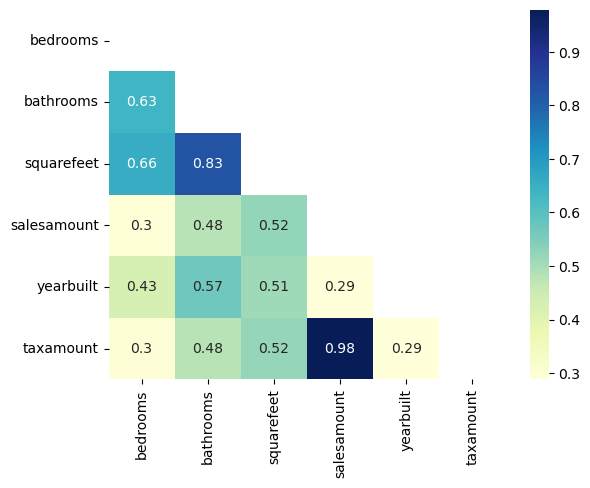

In [8]:
sns.heatmap(zillow_corr, cmap='YlGnBu', annot=True, mask=np.triu(zillow_corr))
plt.show()

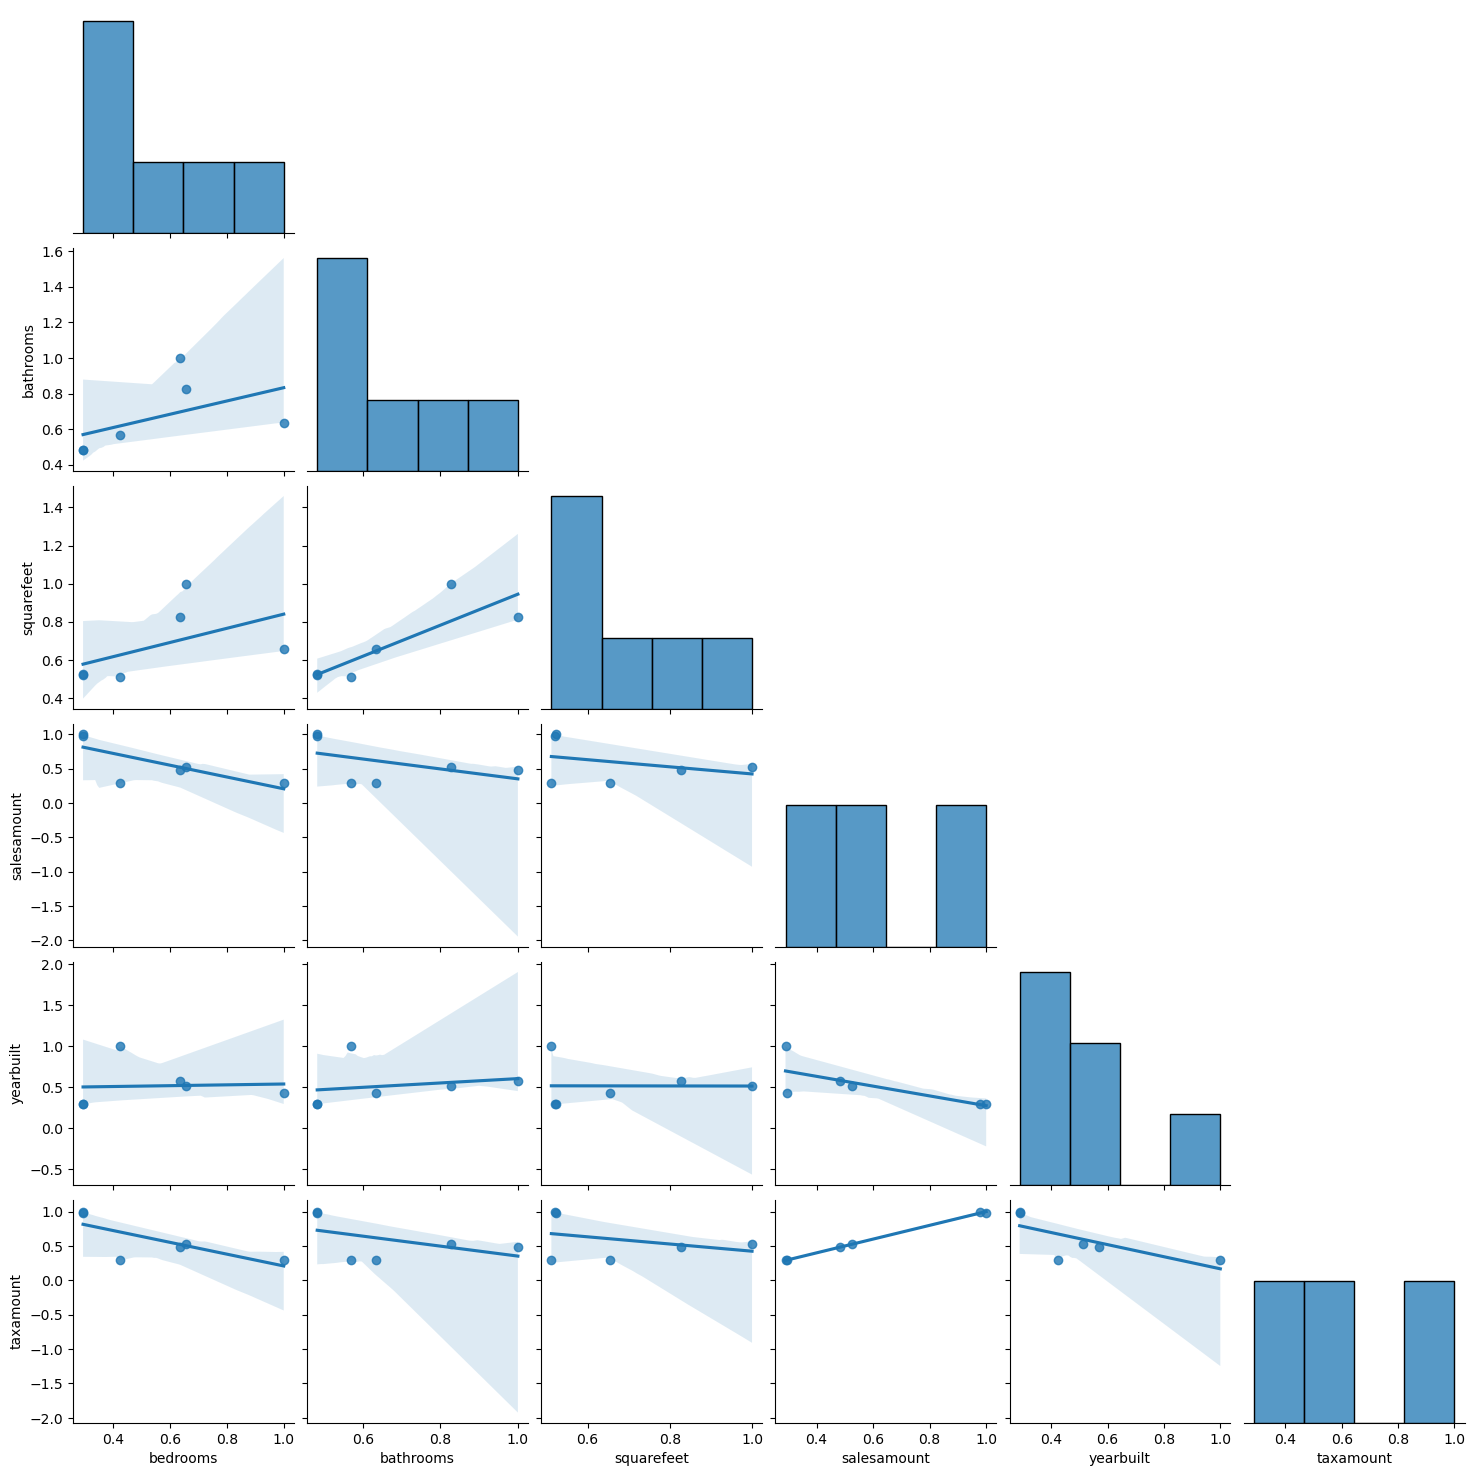

In [9]:
def plot_variable_pairs(zillow_corr):
    sns.pairplot(data=zillow_corr, kind='reg', corner=True)
    return plt.show()
plot_variable_pairs(zillow_corr)

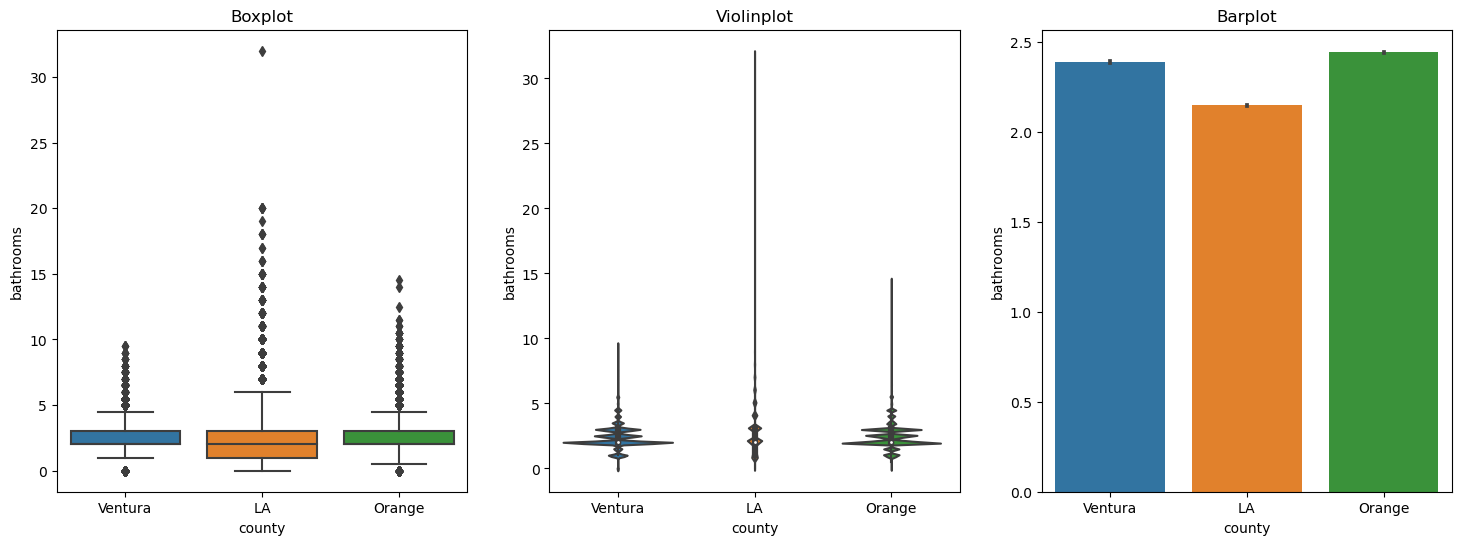

In [23]:
def plot_categorical_and_continuous_vars (train, cat_col, cont_col):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    sns.boxplot(x=cat_col, y=cont_col, data=train, ax=axes[0])
    axes[0].set_title('Boxplot')

    sns.violinplot(x=cat_col, y=cont_col, data=train, ax=axes[1])
    axes[1].set_title('Violinplot')

    sns.barplot(x=cat_col, y=cont_col, data=train, ax=axes[2])
    axes[2].set_title('Barplot')
    
    return plt.show()

plot_categorical_and_continuous_vars(train, 'county', 'bathrooms')

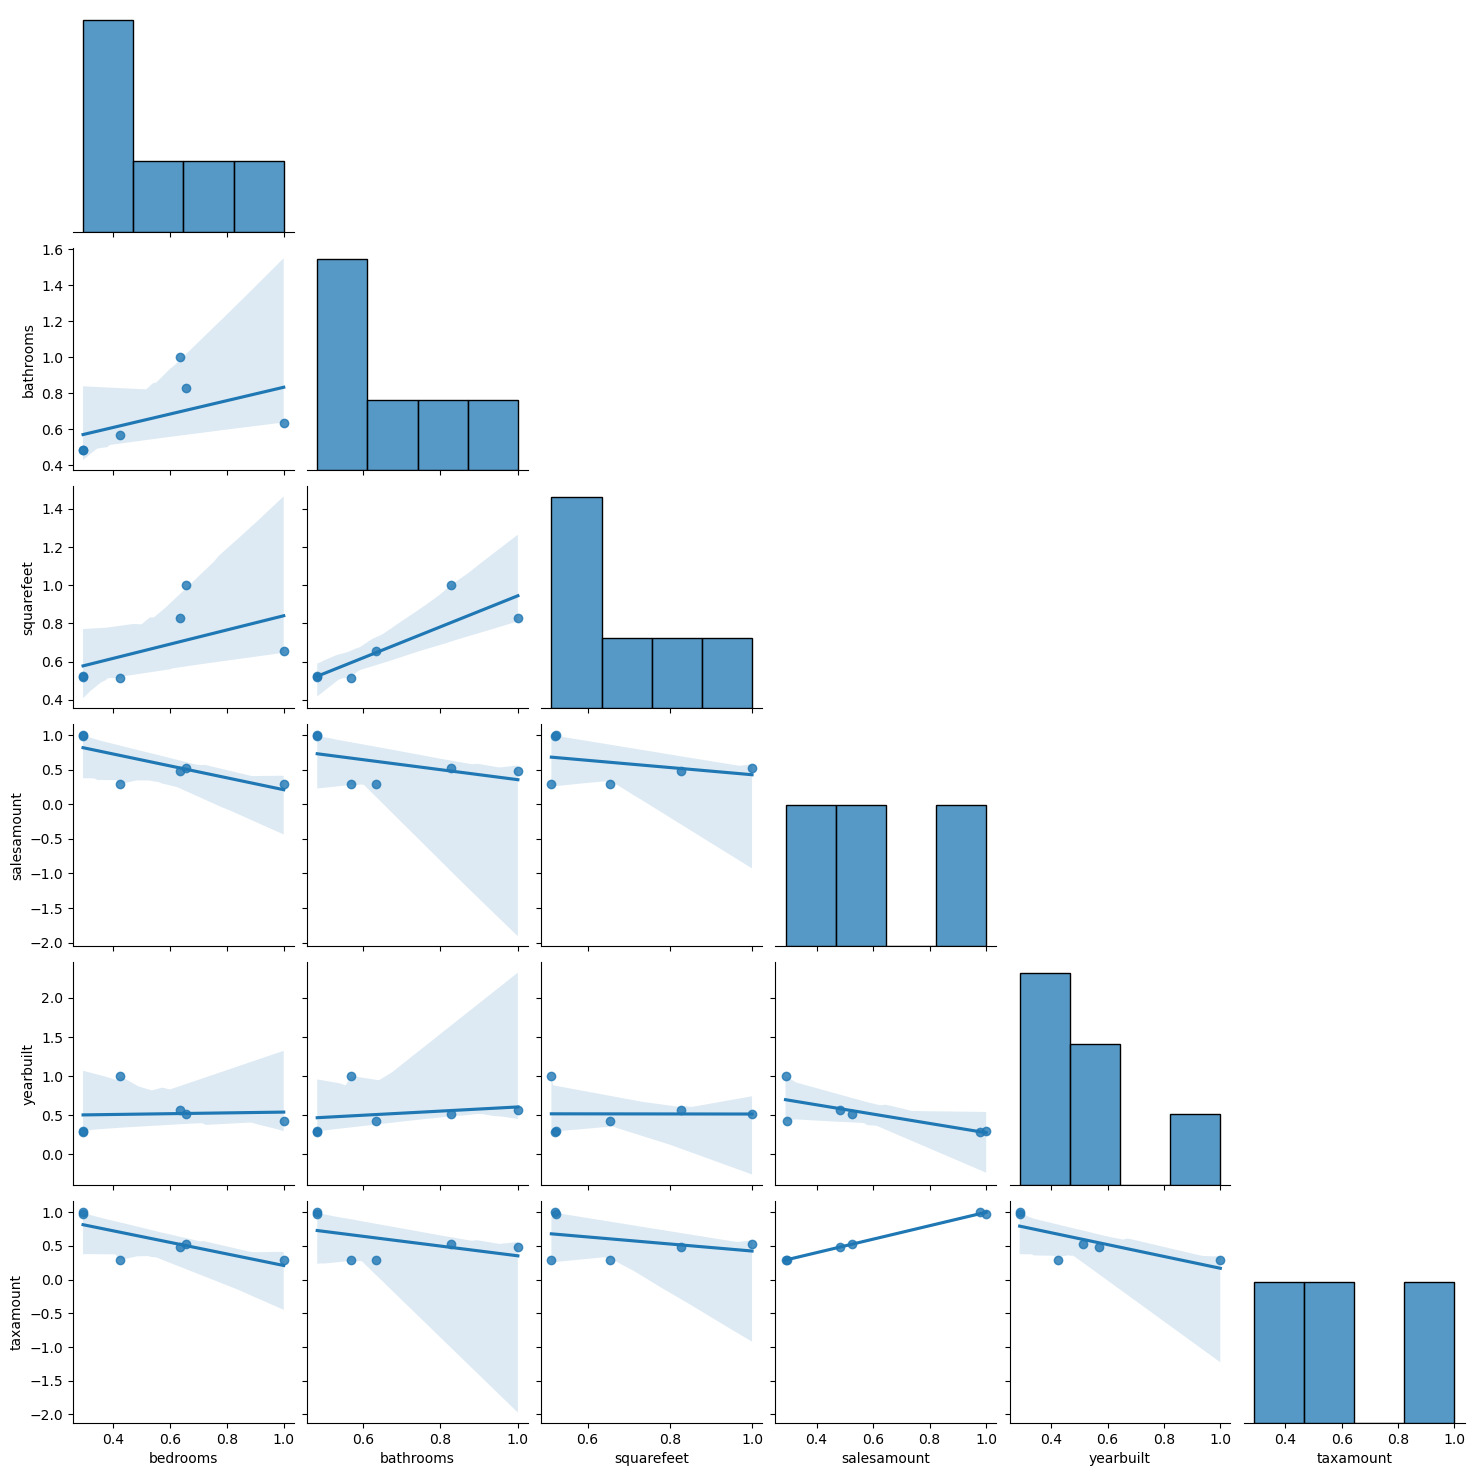

In [9]:
e.plot_variable_pairs(zillow_corr)

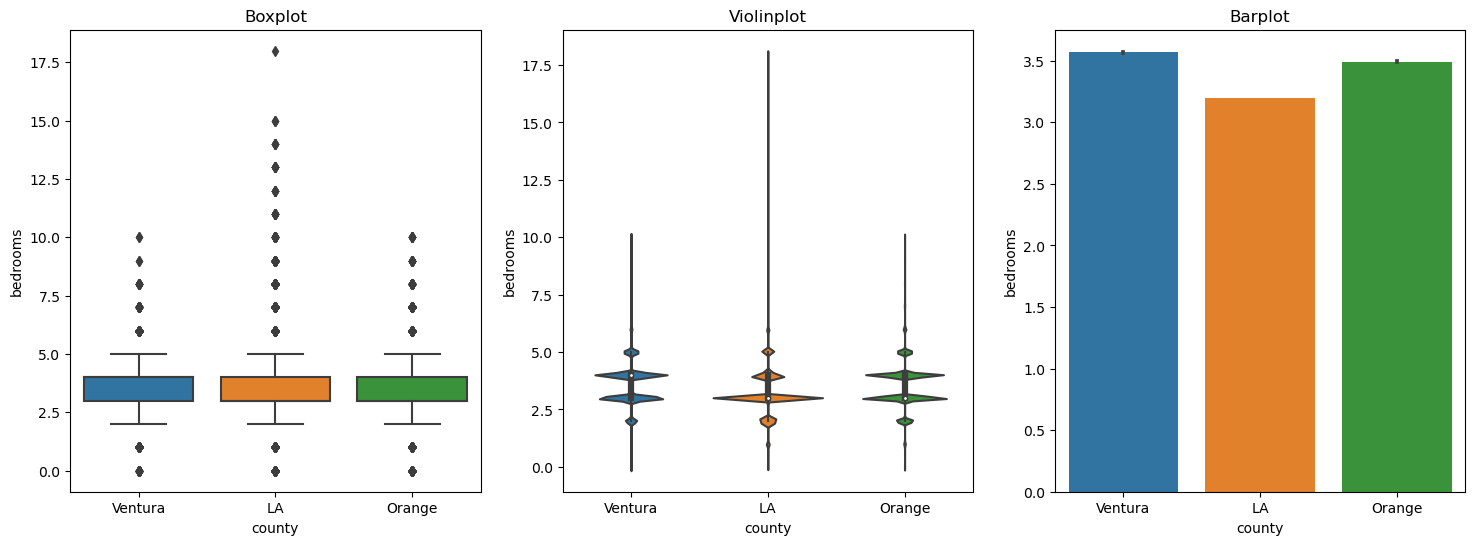

In [10]:
e.plot_categorical_and_continuous_vars(train, 'county', 'bedrooms')

$H_0$: There is NO linear correlation between Bedrooms and Property Value.

$H_a$: There IS linear correlation between Bedrooms and Property Value.

**α**= 0.05

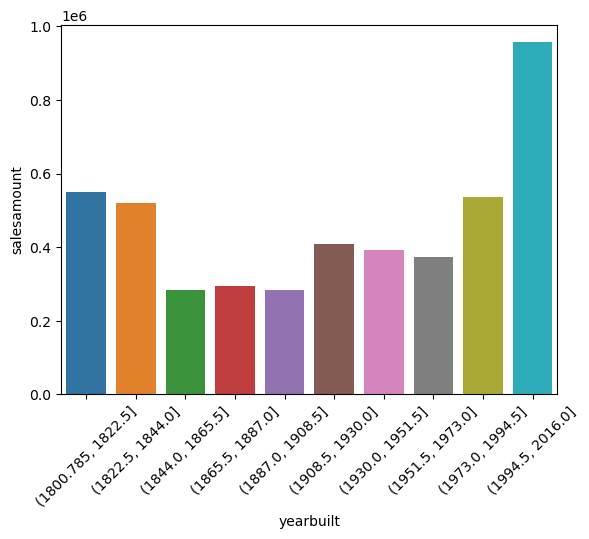

In [45]:
bins = pd.cut(train['yearbuilt'], bins=10)
binned_data = train.groupby(bins)['salesamount'].mean().reset_index()
sns.barplot(x='yearbuilt', y='salesamount', data=binned_data)
plt.xticks(rotation=45)
plt.show()

In [46]:
r, p = spearmanr(train.yearbuilt, train.salesamount)
r, p

(0.289844387805378, 0.0)

In [47]:
alpha = 0.05
if p < alpha:
    print('We can reject our null hypothesis and suggest their is a relationship')
else:
    print('We fail to reject our null hypothesis')

We can reject our null hypothesis and suggest their is a relationship


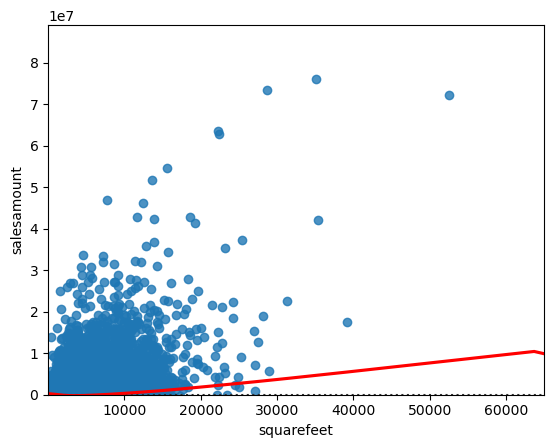

In [53]:
ax = sns.residplot(data=train, x="squarefeet", y="salesamount", lowess=True, line_kws=dict(color="r"))
ax.set_xlim(left=None, right=65000)
ax.set_ylim(bottom=-0.5, top=None)
plt.show()

In [57]:
r, p = spearmanr(train.squarefeet, train.salesamount)
r, p

(0.5236338961752631, 0.0)

In [55]:
alpha = 0.05
if p < alpha:
    print('We can reject our null hypothesis and suggest their is a relationship')
else:
    print('We fail to reject our null hypothesis')

We can reject our null hypothesis and suggest their is a relationship


<Axes: xlabel='bathrooms', ylabel='squarefeet'>

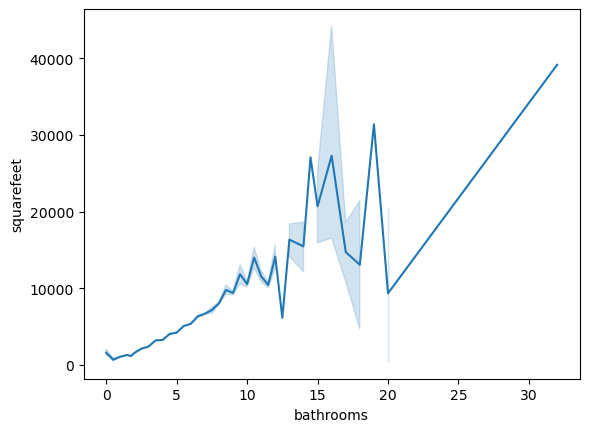

In [61]:
sns.lineplot(data=train, x="bathrooms", y="squarefeet")

<Axes: xlabel='bedrooms', ylabel='squarefeet'>

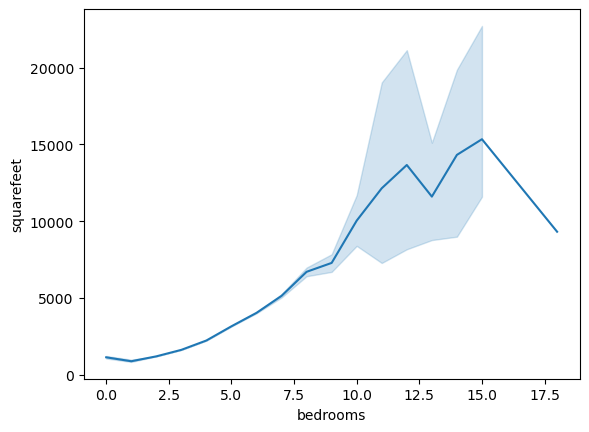

In [62]:
sns.lineplot(data=train, x="bedrooms", y="squarefeet")

In [77]:
r, p = spearmanr(train.bedrooms, train.squarefeet)
r, p

(0.6554743292491011, 0.0)

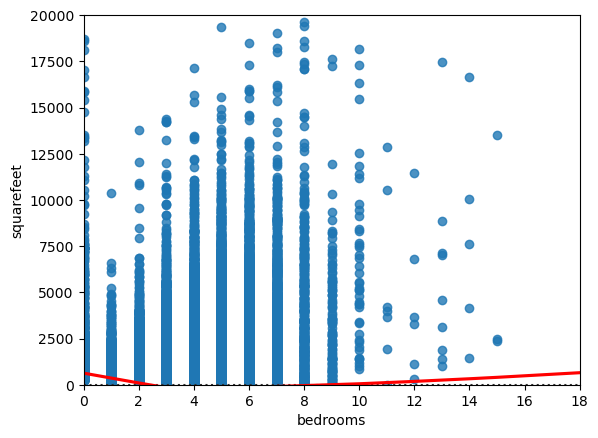

In [76]:
ax = sns.residplot(data=train, x="bedrooms", y="squarefeet", lowess=True, line_kws=dict(color="r"))
ax.set_ylim(bottom=0, top=20000)
plt.show()